In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import math
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import optimizers
import keras
from keras.models import Sequential, Model,load_model
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/paper2_data/train',
                                                 target_size=(64,64),
                                                 class_mode='categorical')

Found 800 images belonging to 3 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/paper2_data/test',
                                            target_size=(64,64),
                                            class_mode='categorical')

Found 200 images belonging to 3 classes.


In [ ]:
import tensorflow
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Initialising the CNN
cnn = tensorflow.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tensorflow.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a fourth convolutional layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

# Adding a fifth convolutional layer
cnn.add(tensorflow.keras.layers.Conv2D(filters=256,padding='same',kernel_size=3, activation='relu'))
cnn.add(tensorflow.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

# Step 3 - Flattening
cnn.add(tensorflow.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tensorflow.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Multi Classification
cnn.add(Dense(3, kernel_regularizer=tensorflow.keras.regularizers.l2(0.01),activation
             ='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
r=cnn.fit(x=training_set,batch_size=50, validation_data=test_set, epochs=100)

Epoch 1/100
 3/25 [==>...........................] - ETA: 2:10 - loss: 1.3895 - accuracy: 0.3958

In [ ]:
cnn.evaluate(test_set)

7/7 [==============================] - 1s 128ms/step - loss: 0.7737 - accuracy: 0.9200


[0.7736685872077942, 0.9200000166893005]

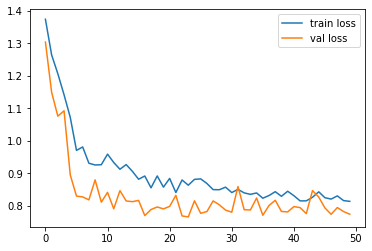

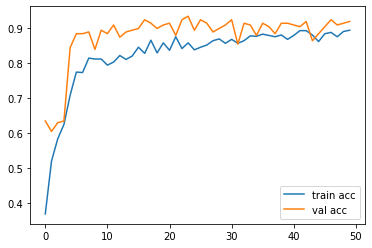

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('model_3_classes.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_3_classes.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
def predict_(image_path):
    #Compile the model
    model.compile(loss="squared_hinge", optimizer='adam',metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64,64))
    cv2_imshow(image)
    #predict the image
    preds = model.predict(np.expand_dims(image, axis=0))[0]
    print(preds);
    if preds[0]==1  and preds[1]==0 and preds[2]==0:
      print("Predicted Label:Covid")
    elif preds[0]==0 and preds[1]==1 and preds[2]==0:
      print("Predicted Label:Normal")
    elif preds[0]==0 and preds[1]==0 and preds[2]==1:
      print("Predicted Label:Pneumonia")

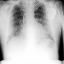

[1. 0. 0.]
Predicted Label:Covid


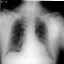

[1. 0. 0.]
Predicted Label:Covid


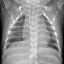

[0. 1. 0.]
Predicted Label:Normal


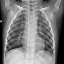

[0. 1. 0.]
Predicted Label:Normal


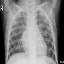

[0. 0. 1.]
Predicted Label:Pneumonia


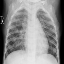

[0.0000000e+00 2.5818972e-30 1.0000000e+00]


In [ ]:
predict_("/content/gdrive/My Drive/paper2_data/test/Covid/COVID-271.png")
predict_("/content/gdrive/My Drive/paper2_data/test/Covid/COVID-280.png")
predict_("/content/gdrive/My Drive/paper2_data/test/Normal/Normal-272.png")
predict_("/content/gdrive/My Drive/paper2_data/test/Normal/Normal-273.png")
predict_("/content/gdrive/My Drive/paper2_data/test/Pneumonia/Viral Pneumonia-273.png")
predict_("/content/gdrive/My Drive/paper2_data/test/Pneumonia/Viral Pneumonia-276.png")